# Visualize the correlation between PC1 and PC2
- This script is used to visualize the correlation between PC1 and PC2 over Output Areas (OAs) by local authorities;
- Simulations: LCZ_GM.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'
data_path= f'{home_path}0_lcz_mcr/output_analysis/regional/HVI/'

In [2]:
gdf_gmcr = gpd.read_file(home_path + '0_lcz_mcr/output_analysis/OA_mcr/MCR_OA/greater_manchester_open_areas.shp')
gdf_gmcr

,label,name,oa21cd,LAD22NM,geometry
0,E92000001E12000002E08000009E02001283E01006087E...,E00030847,E00030847,Trafford,"POLYGON ((374579.881 388588.352, 374575.313 38..."
1,E92000001E12000002E08000003E02001092E01005117E...,E00025872,E00025872,Manchester,"POLYGON ((380953.222 389346.222, 380953 389348..."
2,E92000001E12000002E08000006E02001165E01005690E...,E00028817,E00028817,Salford,"POLYGON ((377435.596 401434, 377421.799 401434..."
3,E92000001E12000002E08000006E02006959E01033988E...,E00181655,E00181655,Salford,"POLYGON ((383502 399046, 383500 399037, 383498..."
4,E92000001E12000002E08000006E02001182E01005602E...,E00181652,E00181652,Salford,"POLYGON ((376601.544 397720.367, 376589.137 39..."
...,...,...,...,...,...
8961,E92000001E12000002E08000003E02001047E01005139E...,E00026032,E00026032,Manchester,"POLYGON ((387334.868 403859.02, 387334.31 4038..."
8962,E92000001E12000002E08000003E02001083E01005076E...,E00025701,E00025701,Manchester,"POLYGON ((384328.975 392243.404, 384330.438 39..."
8963,E92000001E12000002E08000003E02001081E01005155E...,E00026084,E00026084,Manchester,"POLYGON ((381063.745 393577.351, 381066.837 39..."
8964,E92000001E12000002E08000007E02001211E01005770E...,E00029229,E00029229,Stockport,"POLYGON ((384459.404 388618.427, 384459.077 38..."


In [3]:
hvi_scores = pd.read_csv(f'{data_path}hvi_scores.csv')
hvi_scores['local_authority'] = gdf_gmcr['LAD22NM']
hvi_scores.head(2)

,HVI_1,HVI_2,HVI_3,HVI_4,HVI_5,HVI_6,Total_HVI,HVI_Category,local_authority
0,-3.479616,0.590117,-2.520193,0.805416,-0.757812,-0.932621,-6.294708,2,Trafford
1,3.809416,4.437764,2.151332,-0.875522,2.444473,-1.015596,10.951867,10,Manchester


In [48]:
linewidth = 0.5
fontsize = 6
labelcolor = '#6b6b6b'
xwidth = 0.5
marker = 'o'
markersize = 2
pad = 1
length = 2
lc0 = '#377eb8'
lc1 = '#e41a1c'
handletextpad = 0.5
padding = 2

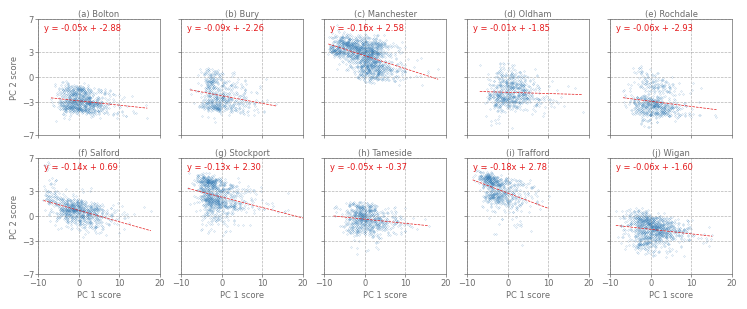

In [49]:
fig, axes = plt.subplots(2, 5, figsize=(7.5, 3))
ax = axes.flatten()
for i, la in enumerate(np.unique(hvi_scores['local_authority'])):
    df_la = hvi_scores[hvi_scores['local_authority'] == la]
    HVI_1 = df_la['HVI_1']
    HVI_2 = df_la['HVI_2']
    ax[i].scatter(HVI_1, HVI_2,s = 0.015, c = lc0, label = 'Output Areas (OAs)')
    x_vals = np.array([HVI_1.min(), HVI_1.max()])
    slope, intercept = np.polyfit(HVI_1, HVI_2, 1)
    y_vals = slope * x_vals + intercept
    ax[i].plot(x_vals, y_vals, color=lc1, linestyle = '--', linewidth = linewidth, label='Correlation Line')
    ax[i].text(0.05, 0.9, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax[i].transAxes, fontsize=fontsize, color=lc1)
    if i <5:
        ax[i].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, labelcolor=labelcolor, 
                          color=labelcolor,labelsize=fontsize,pad=pad, width = xwidth, length = length)
    else:
        ax[i].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelcolor=labelcolor, 
                          color=labelcolor,labelsize=fontsize,pad=pad, width = xwidth, length = length) 
        ax[i].set_xlabel('PC 1 score', fontsize=fontsize, color = labelcolor, labelpad = padding)
    if i in [0, 5]:
        ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,
                          labelsize=fontsize,pad=pad, width = xwidth, length = length)    
        ax[i].set_ylabel('PC 2 score', fontsize=fontsize, color = labelcolor, labelpad = padding)
    else:
        ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=False, labelcolor=labelcolor, color=labelcolor,
                          labelsize=fontsize,pad=pad, width = xwidth, length = length)
    for spine in ax[i].spines.values():
        spine.set_color(labelcolor)
        spine.set_linewidth(xwidth)  
    ax[i].set_title(f"({chr(97 + i)}) {la}", fontsize=fontsize, color = labelcolor, pad = padding)    
    ax[i].set_ylim(-7, 7)
    ax[i].set_xlim(-10, 20)
    ax[i].set_yticks([-7, -3, 0, 3, 7])
    ax[i].grid(True, which='both', axis='both', color=labelcolor, linewidth=linewidth, linestyle='--', alpha=0.5)
plt.subplots_adjust(left=0.05, right=0.975, bottom=0.1, top=0.95, wspace=0.175, hspace= 0.2)    
fig.savefig('pca_local_authority.png', dpi=300)
fig.savefig('pca_local_authority.pdf', dpi=600)    
       

In [41]:
x_vals

array([-6.85085481, 16.88647406])

In [42]:
y_vals

array([-2.51815108, -3.76290108])

In [39]:
regression_line

10     -3.006495
20     -2.699037
25     -2.878107
30     -2.697741
33     -2.676171
          ...   
8903   -2.976349
8906   -2.838106
8914   -2.660618
8943   -3.008960
8950   -2.870041
Name: HVI_1, Length: 910, dtype: float64